<a href="https://colab.research.google.com/github/AliJaffery12/Black_Jack_Strategies_using_RL/blob/main/Basic_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ali Asghar**

**k54765**

**Portfolio3 Source Code**

**Basic Strategy**

**Blackjack Environment:**

Create an environment for the Blackjack game. This environment should be able to take actions as input (like hit, stand, etc.) and return the new state and reward.

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

class BlackjackEnvironment:
    def __init__(self):
        self.deck = self.generate_deck()
        self.player_hand = []
        self.dealer_hand = []
        self.split_hand = []
        self.doubled_down = False

        self.reward_queue = []
        self.length_queue = []

        self.reset()


    def generate_deck(self):
        suits = ['hearts', 'diamonds', 'clubs', 'spades']
        values = list(range(2, 11)) + ['jack', 'queen', 'king', 'ace']
        return [str(value) + '_' + suit for value in values for suit in suits]

    def draw_card(self):
        return self.deck.pop(random.randint(0, len(self.deck) - 1))

    def reset(self):
        self.deck = self.generate_deck()
        self.player_hand = [self.draw_card(), self.draw_card()]
        self.dealer_hand = [self.draw_card(), self.draw_card()]

    def card_value(self, card):
        value = card.split('_')[0]
        if value in ['jack', 'queen', 'king']:
            return 10
        elif value == 'ace':
            return 11
        else:
            return int(value)

    def hand_value(self, hand):
        value = sum(self.card_value(card) for card in hand)
        if value > 21 and any(card.startswith('ace') for card in hand):
            value -= 10
        return value

    def is_soft(self, hand):
        return any(card.startswith('ace') for card in hand) and self.hand_value(hand) <= 21

    def is_busted(self, hand):
        return self.hand_value(hand) > 21

    def dealer_play(self):
        while self.hand_value(self.dealer_hand) < 17:
            self.dealer_hand.append(self.draw_card())



    def is_pair(self, hand):
        if len(hand) == 2:
            return hand[0].split('_')[0] == hand[1].split('_')[0]


    def play(self):
        self.reset()
        print("Welcome to Blackjack!")
        print(f"Your hand: {self.player_hand}")
        print(f"Dealer's up card: {self.dealer_hand[0]}")

        while True:
            #check if player has a pair
            if self.is_pair(self.player_hand):
                split = input("Do you want to split? (y/n): ").lower()
                if split == 'y':
                    # Player chooses to split and draws a card for each hand.
                    self.split_hand = [self.player_hand.pop()]
                    self.player_hand.append(self.draw_card())
                    self.split_hand.append(self.draw_card())
                    print(f"Your new hands: {self.player_hand}, {self.split_hand}")
                    action1 = input(" Enter for first hand  'h' to hit, 's' to stand").lower()
                    action2 = input(" Enter for second hand 'h' to hit, 's' to stand").lower()

                    if action1 == 'h' and action2 == 'h':
                        self.player_hand.append(self.draw_card())
                        self.split_hand.append(self.draw_card())
                        print(f"Your new hands: {self.player_hand}, {self.split_hand}")
                        if self.is_busted(self.player_hand):
                            print("Busted! You First hand lose.")
                        if self.is_busted(self.split_hand):
                            print("Busted! You Second hand lose.")
                        break

                    elif action1 == 'h' and action2 == 's':
                        self.player_hand.append(self.draw_card())
                        print(f"Your new hands: {self.player_hand}, {self.split_hand}")
                        if self.is_busted(self.player_hand):
                            print("Busted! You First hand lose.")
                        if self.is_busted(self.split_hand):
                            print("Busted! You Second hand lose.")
                        break

                    elif action1 == 's' and action2 == 'h':
                        self.split_hand.append(self.draw_card())
                        print(f"Your new hands: {self.player_hand}, {self.split_hand}")
                        if self.is_busted(self.player_hand):
                            print("Busted! You First hand lose.")
                        if self.is_busted(self.split_hand):
                            print("Busted! You Second hand lose.")
                        break

                    elif action1 == 's' and action2 == 's':
                        print(f"Your new hands: {self.player_hand}, {self.split_hand}")
                        if self.is_busted(self.player_hand):
                            print("Busted! You First hand lose.")
                        if self.is_busted(self.split_hand):
                            print("Busted! You Second hand lose.")
                        break
                    else:
                        print("Invalid input. Please try again.")

                else:
                    action = input("Enter 'h' to hit or 's' to stand: ").lower()
                    if action == 'h':
                        self.player_hand.append(self.draw_card())
                        print(f"Your new hand: {self.player_hand}")
                    if self.is_busted(self.player_hand):
                        print("Busted! You lose.")
                        break
                    elif action == 's':
                        self.dealer_play()
                        print(f"Dealer's final hand: {self.dealer_hand}")
                        player_value = self.hand_value(self.player_hand)
                        dealer_value = self.hand_value(self.dealer_hand)

                        if self.is_busted(self.dealer_hand) or player_value > dealer_value:
                            print("You win!")
                        elif dealer_value > player_value:
                            print("You lose.")
                        else:
                            print("It's a tie!")
                        break

            else:
                action = input("Enter 'h' to hit or 's' to stand: ").lower()
                if action == 'h':
                    self.player_hand.append(self.draw_card())
                    print(f"Your new hand: {self.player_hand}")
                    if self.is_busted(self.player_hand):
                        print("Busted! You lose.")
                        break
                elif action == 's':
                    self.dealer_play()
                    print(f"Dealer's final hand: {self.dealer_hand}")
                    player_value = self.hand_value(self.player_hand)
                    dealer_value = self.hand_value(self.dealer_hand)

                    if self.is_busted(self.dealer_hand) or player_value > dealer_value:
                        print("You win!")
                    elif dealer_value > player_value:
                        print("You lose.")
                    else:
                        print("It's a tie!")
                    break




    def step(self, action):

        # Perform the given action ('h' for hit, 's' for stand) and return the next state, reward, and if the game has ended.
        if action == 'h':
            # Player chooses to hit and draws a card.
            self.player_hand.append(self.draw_card())
            if self.is_busted(self.player_hand):
                self.reward_queue.append(-1)  # Update return_queue
                self.length_queue.append(len(self.player_hand))  # Update length_queue
                if self.doubled_down:
                    return 'terminal', -2, True
                else:
                # Player is busted and loses the game.
                    return 'terminal', -1, True


        elif action == 's':
            # Player chooses to stand and the dealer plays their turn.
            self.dealer_play()
            player_value = self.hand_value(self.player_hand)
            dealer_value = self.hand_value(self.dealer_hand)

            if self.is_busted(self.dealer_hand) or player_value > dealer_value:
                # Player wins if the dealer is busted or has a lower hand value.
                self.reward_queue.append(1)  # Update return_queue
                self.length_queue.append(len(self.player_hand))  # Update length_queue
                return 'terminal', 1, True
            elif dealer_value > player_value:
                # Player loses if the dealer has a higher hand value.
                self.reward_queue.append(-1)  # Update return_queue
                self.length_queue.append(len(self.player_hand))  # Update length_queue
                return 'terminal', -1, True
            else:
                # The game is a tie if the player and dealer have the same hand value.
                self.reward_queue.append(0)  # Update return_queue
                self.length_queue.append(len(self.player_hand))  # Update length_queue
                return 'terminal', 0, True

        elif action == 'p' and self.is_pair(self.player_hand):
                # Player chooses to split and draws a card for each hand.
                self.split_hand = [self.player_hand.pop()]
                self.player_hand.append(self.draw_card())
                self.split_hand.append(self.draw_card())
                return self.get_state(), 0, False

        elif action == 'd':
                # Player chooses to double down and draws a card.
                self.doubled_down = True
                self.player_hand.append(self.draw_card())
                if self.is_busted(self.player_hand):
                    # Player loses twice their bet
                    return  'terminal', -2, True
                return self.get_state(), 0, False

        # If the game is not over, return the current state, reward of 0, and False for not done.
        return self.get_state(), 0, False

    def get_state(self):
        # Return the current state as a tuple containing the player's hand value and the dealer's up card value.
        return (self.hand_value(self.player_hand), self.card_value(self.dealer_hand[0]), self.is_soft(self.player_hand), len(self.split_hand) > 0, self.doubled_down)


**Q-Learning Agent**

Agent Implementation: Implement a reinforcement learning agent. This agent should have a policy that it follows, and it should be able to update this policy based on the rewards it gets.

Agent Action: 1 = Hit, 0 = Stand, 2= Split, 3 = Double Down

In [ ]:

class QLearningAgent:
    def __init__(self, env, num_episodes, initial_epsilon, epsilon_decay, final_epsilon, alpha=0.1, gamma=0.99):
        # Initialize the Q-learning agent with the given environment and learning parameters.
        self.env = env
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = initial_epsilon  # Exploration rate
        self.num_episodes = num_episodes  # Number of episodes to train
        self.epsilon_decay = epsilon_decay # Decay rate for epsilon
        self.final_epsilon = final_epsilon
        self.Q = {}  # Q-value dictionary mapping (state, action) pairs to Q-values
        self.training_error = []

    def get_Q(self, state, action):
        return self.Q.get((state, action), 0)


    def choose_action(self, state):
        '''
        Choose an action to take in the given state based on the current Q-values and exploration rate.
        '''
        # check if player has soft hand
        if self.env.is_soft(self.env.player_hand):
            soft_action = self.soft_standing_action(state)
            return soft_action
        else:
            hard_action = self.hard_standing_action(state)
            return hard_action


    def hard_standing_action(self, state):
        # player hand
        player_hand_value = state[0]

        # dealers hand
        dealers_hand = state[1]

        # Table 3.1 recommends drawing on all hard totals of 11 or less.
        if player_hand_value <= 11:
            return 'h'
        # Table 3.1 recommends standing on all hard totals of 17 or more.
        elif player_hand_value >= 17:
            return 's'
        # Table 3.1 recommends drawing on all hard totals of 12 through 16 if the dealer's up card is 7 or more.
        elif 12 <= player_hand_value <= 16 and dealers_hand >= 7:
            return 'h'
        # Table 3.1 recommends standing on all hard totals of 12 through 17 if the dealer's up card is 6 until 4
        elif 12 <= player_hand_value <= 17 and 4 <= dealers_hand <= 6:
            return 's'
        # Table 3.1 recommends standing on all hard totals of 13 through 17 if the dealer's up card is 2 or 3
        elif 13 <= player_hand_value <= 17 and (dealers_hand == 2 or dealers_hand == 3):
            return 's'
        # Table 3.1 recommends drawing on all hard totals of 12 if the dealer's up card is 2 or 3.
        elif player_hand_value == 12 and (dealers_hand == 2 or dealers_hand == 3):
            return 'h'
        else:
            return 'h'  # default action
        # if you stand on a given total against a dealer’s given up card, you also stand on all higher totals against that up card.
        # Similarly, if you draw on a given total against a given up card, you also draw to all lower totals against that up card.


    def soft_standing_action(self, state):
        # player hand
        player_hand_value = state[0]
        dealer_hand = state[1]
        # Table 3.2 recommends drawing on all soft totals of 17 or less.
        if player_hand_value <= 17:
            return 'h'
        # Table 3.2 recommends standing if the player has a soft 18 and the dealer's up card is 9 an 10
        elif player_hand_value == 18 and (dealer_hand == 9 or dealer_hand == 10):
            return 'h'
        else :
            return 's'



    def update(self, state, action, next_state, reward):
        # Update the Q-value table using the Q-learning update rule.

        # Get the current Q-value for the given state and action.
        current_q = self.Q.get((state, action), 0)

        # Get the maximum Q-value for the next state across all actions.
        next_q = max(self.Q.get((next_state, a), 0) for a in ['h', 's'])

        # Training error
        temporal_difference = reward + self.gamma * next_q - current_q

        # Update the Q-value for the current state and action using the Q-learning update rule.
        self.Q[(state, action)] = current_q + self.alpha * temporal_difference

        # Append the temporal difference to the training error list.
        self.training_error.append(temporal_difference)

    # Decay epsilon
    def decay_epsilon(self):
        self.epsilon = max(self.final_epsilon, self.epsilon - self.epsilon_decay)

    def train(self, num_episodes):
    # Train the Q-learning agent by running the algorithm for the specified number of episodes.
        for episode in range(num_episodes):
            # Loop through each episode in the total number of episodes to train.
            self.env.reset()
            # Reset the environment at the start of each episode.
            state = self.env.get_state()
            # Get the initial state from the environment.
            done = False
            # Set the "done" flag to False, indicating that the episode is not yet finished.
            while not done:
                # Choose an action based on the current state using the Q-learning agent's policy.
                action = self.choose_action(state)
                # Take the chosen action in the environment and receive the next state, reward, and a flag indicating if the episode is done.
                next_state, reward, done = self.env.step(action)
                # Update the Q-value table using the current state, action, next state, and reward.
                self.update(state, action, next_state, reward)
                # Update the current state to be the next state for the next iteration of the loop.
                state = next_state
            # Decay epsilon
            self.decay_epsilon()


    def play_game(self):
        self.env.reset()
        state = self.env.get_state()
        done = False
        print("Welcome to Blackjack!")
        print(f"Your hand: {self.env.player_hand}")
        print(f"Dealer's up card: {self.env.dealer_hand[0]}")

        while not done:
            action = self.choose_action(state)
            print(f"Agent chooses to {'hit' if action == 'h' else 'stand'}")
            state, reward, done = self.env.step(action)

        print("Final hands:")
        print(f"Your hand: {self.env.player_hand}")
        print(f"Dealer's hand: {self.env.dealer_hand}")

        if reward == 1:
            print("You win!")
        elif reward == -1:
            print("You lose.")
        else:
            print("It's a tie!")



**Train and Evaluate the Agent**
Evaluate the agent by having it play many games without updating the policy and see how often it wins. Compare this to a random agent that simply takes random actions at each step

In [ ]:
if __name__ == "__main__":

    # Hyperparameters
    num_episodes = 200000
    initial_epsilon = 1.0
    epsilon_decay = initial_epsilon / (num_episodes / 2)  # reduce the exploration over time
    final_epsilon = 0.1

    env = BlackjackEnvironment()
    use_basic_strategy = True  # Or False, depending on whether you want to use the basic strategy
    agent = QLearningAgent(env, num_episodes, initial_epsilon, epsilon_decay, final_epsilon)
    env.play()
    agent.play_game()
    # Train the agent
    agent.train(num_episodes)



Welcome to Blackjack!
Your hand: ['3_diamonds', '2_spades']
Dealer's up card: 7_hearts
Enter 'h' to hit or 's' to stand: s
Dealer's final hand: ['7_hearts', '4_clubs', '4_diamonds', 'queen_diamonds']
You win!
Welcome to Blackjack!
Your hand: ['5_diamonds', '10_spades']
Dealer's up card: 4_hearts
Agent chooses to stand
Final hands:
Your hand: ['5_diamonds', '10_spades']
Dealer's hand: ['4_hearts', '10_clubs', 'king_spades']
You win!


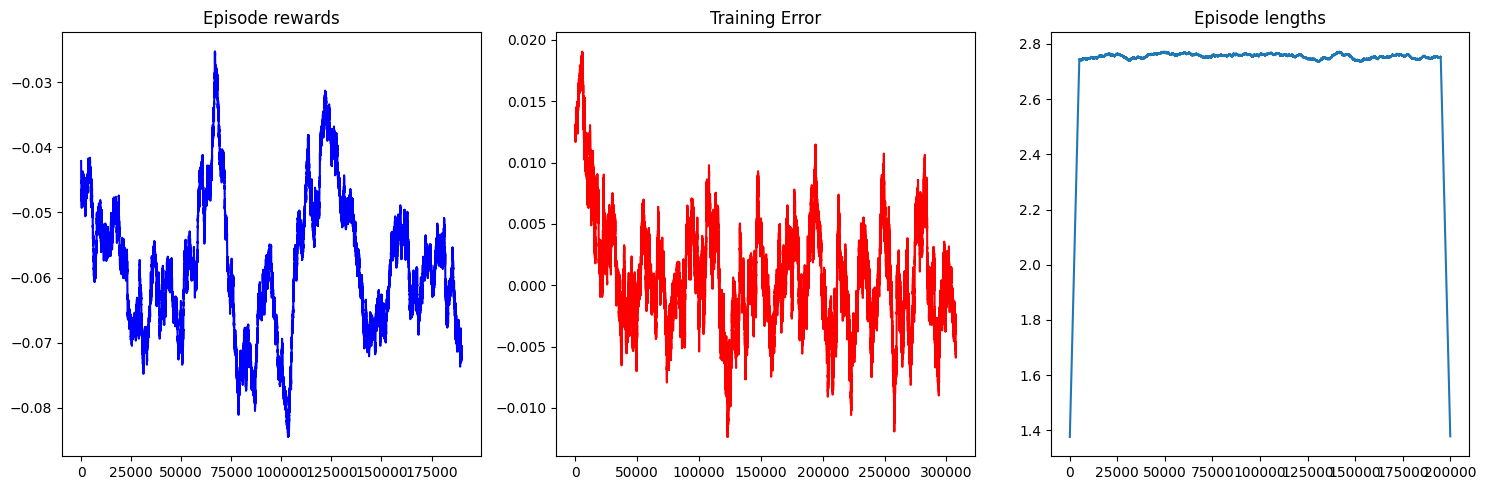

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Visualize the agent training
length_step = 10000
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
axs[0].set_title('Episode rewards')

# compute and assign a rolling average of the data to provide a smoother graph
reward_moving_average = (np.convolve(np.array(env.reward_queue).flatten(), np.ones(length_step), mode="valid")/ length_step)
axs[0].plot(range(len(reward_moving_average)), reward_moving_average, color='blue')

axs[1].set_title("Training Error")
training_error_moving_average = (np.convolve(np.array(agent.training_error), np.ones(length_step), mode="same") / length_step)
axs[1].plot(range(len(training_error_moving_average)), training_error_moving_average, color='red')

axs[2].set_title("Episode lengths")
length_moving_average = (np.convolve(np.array(env.length_queue).flatten(), np.ones(length_step), mode="same")/ length_step)
axs[2].plot(range(len(length_moving_average)), length_moving_average)

plt.tight_layout()
plt.show()


In [ ]:
def evaluate_agent(agent, num_games=10000):
    wins = 0
    losses = 0
    ties = 0

    for _ in range(num_games):
        agent.env.reset()
        state = agent.env.get_state()
        done = False

        while not done:
            action = random.choice(['h', 's'])
            state, reward, done = agent.env.step(action)

        if reward > 0:
            wins += 1
        elif reward < 0:
            losses += 1
        else:
            ties += 1

    win_rate = wins / num_games
    loss_rate = losses / num_games
    tie_rate = ties / num_games

    return win_rate, loss_rate, tie_rate

win_rate, loss_rate, tie_rate = evaluate_agent(agent)
print(f"Win rate: {win_rate:.2f}, Loss rate: {loss_rate:.2f}, Tie rate: {tie_rate:.2f}")


Win rate: 0.29, Loss rate: 0.67, Tie rate: 0.04


**Visualizing the policy**
- Visualize the policy that the agent has learned by plotting the value of the state (i.e. the probability of winning) for each possible state of the game. You should plot the value of the state for each possible player hand value (12-21) and each possible dealer hand value (1-10). You should see that the agent has learned to stand when it has a high probability of winning and hit when it has a low probability of winning.

In [ ]:
from collections import defaultdict
import seaborn as sns
from matplotlib.patches import Patch

def create_grids(agent, soft=True):
   """Create value and policy grid given an agent."""
    # convert our state-action values to state values
    # and build a policy dictionary that maps observations to actions

   # initialize empty dictionaries for state values and policy
   state_values = defaultdict(float)
   policy = defaultdict(int)

   for state_action in agent.Q.keys():
       state, action = state_action
       #print(state_action)
       #print(state)
       #print(action)
       if state not in policy:

           state_values[state] = max(agent.Q.get((state, a), 0) for a in ['h', 's'])
           #print(state_values)


           # map 'h' to 1 and 's' to 0
           policy[state] = 1 if action == 'h' else 0
           #policy[state] = action
           #print(action)
           #print(policy)

   player_count, dealer_count = np.meshgrid(
        # players count, dealers face-up card
        np.arange(10, 22),
        np.arange(2, 12),
    )

   # get the state values for each player and dealer count
   value = np.apply_along_axis(
        lambda state: state_values.get((state[0], state[1], soft, False,  False)),
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )


   value_grid = player_count, dealer_count, value

   policy_grid = np.apply_along_axis(
        lambda state: policy.get((state[0], state[1],soft, False, False), 1),
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
   #print(policy_grid)
   return value_grid, policy_grid



# plot the value grid
def plot_grids(value_grid, policy_grid, title: str):
    # crate a plot using balue grid and policy grid
    player_count, dealer_count, value = value_grid
    fig = plt.figure(figsize=plt.figaspect(0.4))
    fig.suptitle(title, fontsize=15)




    # plot the policy
    fig.add_subplot(1, 2, 2)
    ax2 = sns.heatmap(policy_grid, linewidth=0, annot=True, cmap="viridis", cbar=True)
    ax2.set_title(f"Policy: {title}")
    ax2.set_xlabel(" sum of Player")
    ax2.set_ylabel(" showing the Dealer")
    ax2.set_xticklabels(range(10, 22))

    # 11 is string value for ace, we add it manually
    ax2.set_yticklabels([2,3,4,5,6,7,8,9,10,"Ace"], fontsize=12)


    # add a legend
    legend_elements = [
        Patch(facecolor="lightgreen", edgecolor="black", label="Hit"),
        Patch(facecolor="grey", edgecolor="black", label="Stand"),
    ]
    ax2.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))
    return fig



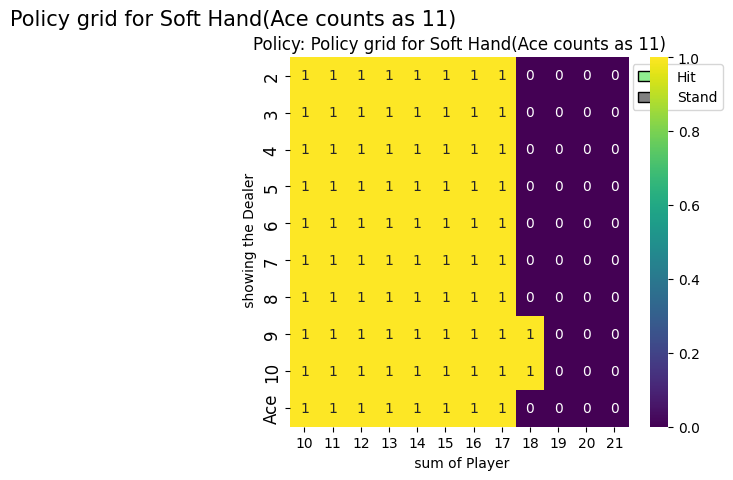

In [ ]:
# state values & policy with usable ace (ace counts as 11)
value_grid, policy_grid = create_grids(agent, soft=True)
fig = plot_grids(value_grid, policy_grid, title="Policy grid for Soft Hand(Ace counts as 11)")
plt.show()

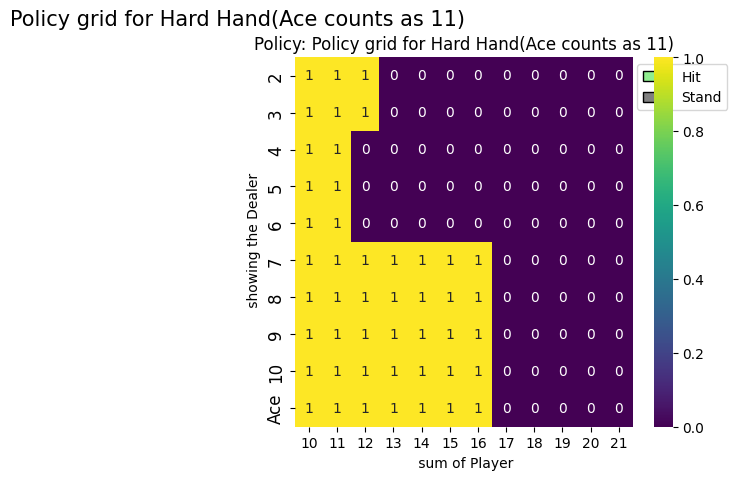

In [ ]:
# state values & policy with usable ace (ace counts as 11)
value_grid, policy_grid = create_grids(agent, soft=False)
fig = plot_grids(value_grid, policy_grid, title="Policy grid for Hard Hand(Ace counts as 11)")
plt.show()